<a href="https://colab.research.google.com/github/kocurvik/edu/blob/master/PSO/notebooks/solutions/PSO_cv09_en_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 9 - Fourier transform

In this lab we will work with the Fourier transformation.

## Discrete Fourier transformation - 1D
**Definition**
$$F_k = \mathscr{F}[ \vec{f}]_k = \sum_{n = 0}^{N - 1} f_n \cdot e^{\frac{-2 \pi i n k}{N}}$$

**Inverse**
$$f_n = \mathscr{F}^{-1}[\vec{F}]_n = \frac{1}{N} \sum_{k = 0}^{N - 1} F_k \cdot e^{\frac{2 \pi i n k}{N}}$$


The Fourier transform shows how strongly different frequencies are present in an image. This is also called the spectral domain.

In the spectral domain (after transformation) the lower frequencies are closer to the center and higher ones are at the edges.


## Complex numbers

We will be working with complex numbers. To work with them you shoud check `np.real, np.imag, np.abs, np.angle`.



In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Exercise - Displaying the 2D Fourier Transform

Display the magnitute of Fourier transform for the images downloaded in the block below. Display the angles for some of them.

To work with fourier transform you will need to display the images in log-scale and also perform shifting. Consult the [OpenCV tutorial](https://docs.opencv.org/4.x/de/dbc/tutorial_py_fourier_transform.html).

In [2]:
!wget https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/building.jpg
!wget https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/building_wavy.jpg
!wget https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/pruhysikme.pgm
!wget https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/pruhyvert.pgm
!wget https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/pruhyhoriz.pgm
!wget https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/elk.png

--2023-11-14 16:45:10--  https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/building.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57259 (56K) [image/jpeg]
Saving to: ‘building.jpg’

building.jpg        100%[===================>]  55.92K  --.-KB/s    in 0.002s  

2023-11-14 16:45:10 (35.4 MB/s) - ‘building.jpg’ saved [57259/57259]

--2023-11-14 16:45:10--  https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/building_wavy.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109911 (107K) [image/jpeg]

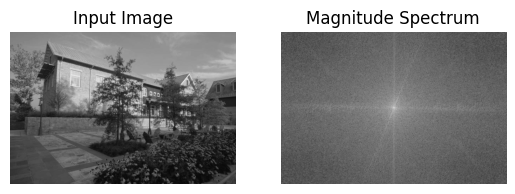

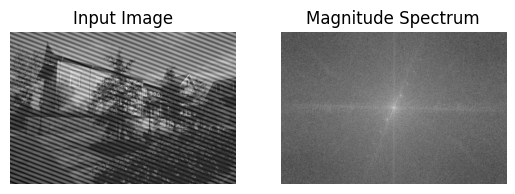

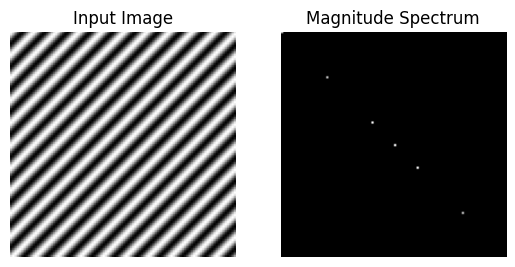

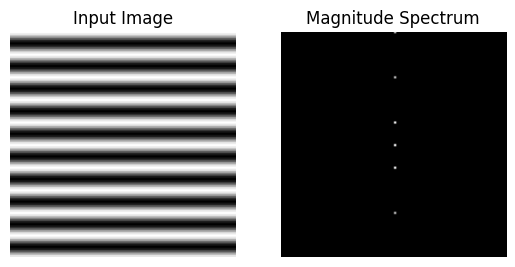

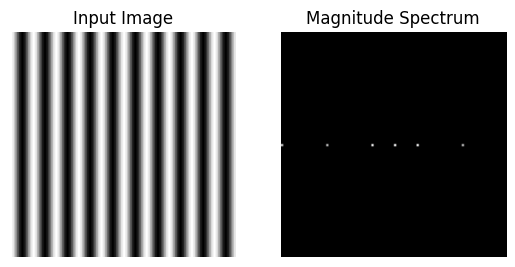

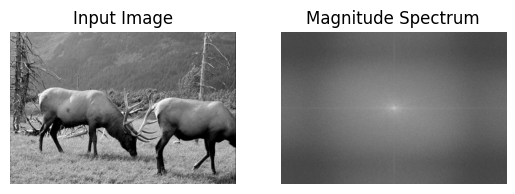

In [4]:
def disp_fourier_mag(img):
  dft = np.fft.fft2(np.float32(img))
  dft_shift = np.fft.fftshift(dft)
  magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1e-8)
  plt.subplot(121),plt.imshow(img, cmap = 'gray')
  plt.axis('off')
  plt.title('Input Image')
  plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
  plt.title('Magnitude Spectrum')
  plt.axis('off')
  plt.show()


img_names = ['building.jpg', 'building_wavy.jpg', 'pruhysikme.pgm', 'pruhyhoriz.pgm', 'pruhyvert.pgm', 'elk.png']

for img_name in img_names:
  img = cv2.imread(img_name, cv2.IMREAD_GRAYSCALE)
  disp_fourier_mag(img)

### Exercise 2 - Generating images

Generate an image similar to pruhyvert using by creating the image in the fourier spectrum.

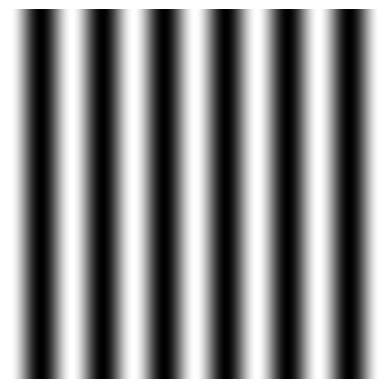

In [5]:
f_img = np.zeros([999, 999])
f_img[499, 510] = 100.0
f_shift = np.fft.ifftshift(f_img)
img = cv2.idft(f_shift)

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()


### Exercise 3 - Removing Periodic Noise

Try to suppress the periodic noise from `building_wavy.jpg`.

*Hint:* Look at the magnitute of the fourier transform to identify the frequency that needs to be suppressed.

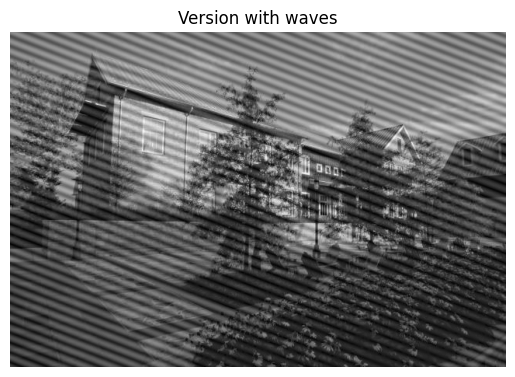

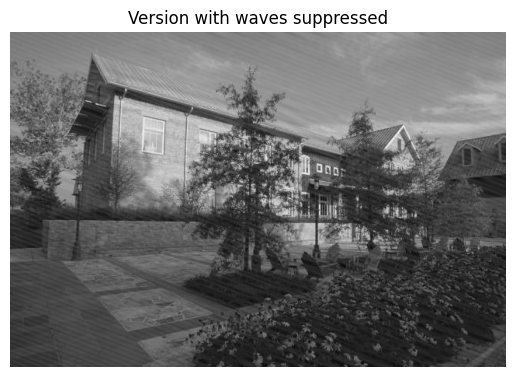

In [7]:
# this is how the image was created

img = cv2.imread('building.jpg', cv2.IMREAD_GRAYSCALE)

dft = np.fft.fft2(np.float32(img))
dft_shift = np.fft.fftshift(dft)
dft_shift[250, 300] = 1e7
dft = np.fft.ifftshift(dft_shift)
img_wavy = np.fft.ifft2(dft)

img_wavy = np.abs(img_wavy)
img_wavy -= np.min(img_wavy)
img_wavy /= np.max(img_wavy)
cv2.imwrite('building_wavy.jpg', img_wavy * 255)


img_wavy = cv2.imread('building_wavy.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_wavy, cmap='gray', vmin=0, vmax=255)
plt.title('Version with waves')
plt.axis('off')
plt.show()

# disp_fourier_mag(img_wavy)

dft = np.fft.fft2(np.float32(img_wavy))
dft_shift = np.fft.fftshift(dft)
dft_shift[240:260, 290:310] = 0
dft_shift[170:190, 330:350] = 0
dft = np.fft.ifftshift(dft_shift)
img = np.fft.ifft2(dft)

img = np.abs(img)

# disp_fourier_mag(img)

plt.imshow(img, cmap='gray')
plt.title("Version with waves suppressed")
plt.axis('off')
plt.show()

## Filtering in the Fourier Domain

Since high frequencies carry details. If we only keep the high frequencies we will obtain mostly edges. If we only keep the low frequencies we will get a blurred image.

**Highpass filter:** We transform the image and set the low frequencies to zero and then we perform the inverse transform.

**Lowpass filter:** The same process but with high frequencies.



### Exercise 4 - Filtering

Perform filtering using highpass and lowpass filters. Try it with different cutoff frequencies.

In [ ]:
def disp_filt(image, r):
  f = np.fft.fft2(image)
  fshift = np.fft.fftshift(f)

  rows, cols = image.shape
  crow, ccol = rows // 2, cols // 2
  mask = np.zeros((rows, cols), np.uint8)

  mask[crow - r:crow + r, ccol - r:ccol + r] = 1

  fshift_low = fshift * mask
  fshift_high = fshift * (1 - mask)

  f_ishift_low = np.fft.ifftshift(fshift_low)
  image_filtered_low = np.fft.ifft2(f_ishift_low)
  image_filtered_low = np.abs(image_filtered_low)


  f_ishift_high = np.fft.ifftshift(fshift_high)
  image_filtered_high = np.fft.ifft2(f_ishift_high)
  image_filtered_high = np.abs(image_filtered_high)

  plt.figure(figsize=(15, 6))
  plt.subplot(131), plt.imshow(image, cmap='gray')
  plt.title('Input Image')
  plt.axis('off')
  plt.subplot(132), plt.imshow(image_filtered_low, cmap='gray')
  plt.title('Ideal Low-pass Filtered Image')
  plt.axis('off')
  plt.subplot(133), plt.imshow(image_filtered_high, cmap='gray')
  plt.title('Ideal high-pass Filtered Image')
  plt.axis('off')
  plt.show()

image = cv2.imread('elk.png', 0)
for r in [10, 20, 30, 50, 100]:
  disp_filt(image, r)